/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6435676741130092

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6787705161429651

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6517862140954338

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6625613216028667

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6321268239768414

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6567576745449606

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6569986207635345

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6427812467205374

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6508318796052803

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.648171570809892


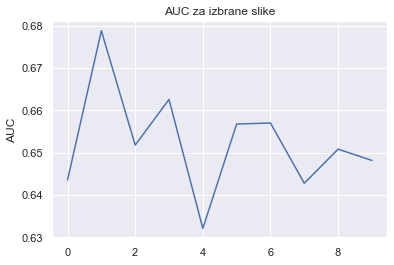

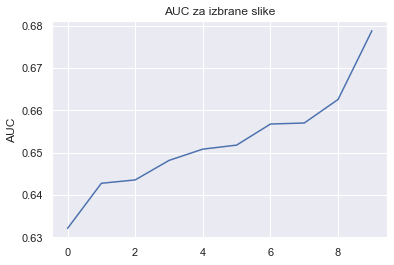

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import divide_texts, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt
from basic_factorization import BasicFactorization

# Parameters
data_directory = '../../data/generated-data-nr-2-n-02-l-100/'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
ids_vector = [int(name.split('-')[0]) for name in file_names]
categories_vector = [name.split('-')[1] for name in file_names]
ratings_vector = [int(name.split('.')[0].split('-')[2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features, new_ratings_vector, new_categories_vector, new_ids_vector, new_paths_vector, text_indexes = divide_texts(name_vector, ratings_vector, categories_vector, ids_vector, n=10)

ratings_vector = new_ratings_vector
ids_vector = new_ids_vector

cv_results_file = '../results/cv-generated-data-nr-2-n-02-l-100-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-02-l-100-knn.csv'
save_scores(scores, results_file)


Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6529653841609893

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6631243698555769

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6519246078354606

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6737991194367032

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6398350580656211

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6799064546000478

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6507398550122181

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6746702848512749

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6515894888801397

Preselection

Object selection: rf

Dfmf

Parameters

14 10 8 4


auc: 0.6805531831438567


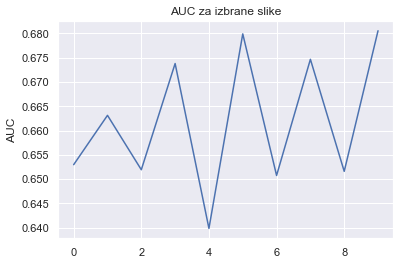

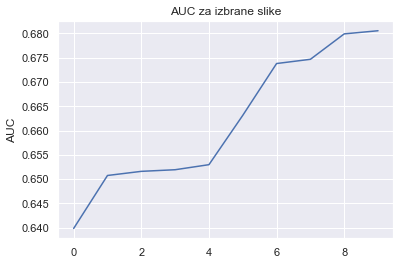

In [2]:
cv_results_file = '../results/cv-generated-data-nr-2-n-02-l-100-rf.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-02-l-100-rf.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.6616771751600787
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.6527535482759363
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.655162663773405
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.66130040586541
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.6497424766330329
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.661657531362281
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.6708699840761695
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.6605074148374783
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.647745275339147
Object selection: random

Dfmf

Parameters

10 10 4 4


auc: 0.6372090354730837


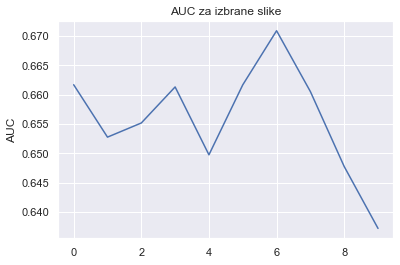

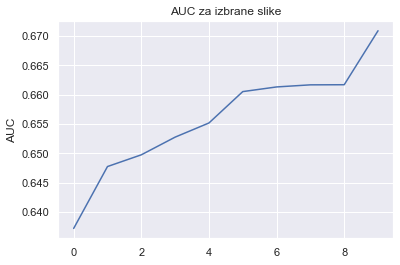

In [3]:
cv_results_file = '../results/cv-generated-data-nr-2-n-02-l-100-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-02-l-100-random.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.6635235881197643
Object selection: random

Dfmf

auc: 0.6651701927644407
Object selection: random

Dfmf

auc: 0.6646054671562628
Object selection: random

Dfmf

auc: 0.6654816217048272
Object selection: random

Dfmf

auc: 0.6876073619631902
Object selection: random

Dfmf

auc: 0.6790466996656905
Object selection: random

Dfmf

auc: 0.6588552821803384
Object selection: random

Dfmf

auc: 0.6770312197013768
Object selection: random

Dfmf

auc: 0.6484416546060382
Object selection: random

Dfmf

auc: 0.6823218743998464


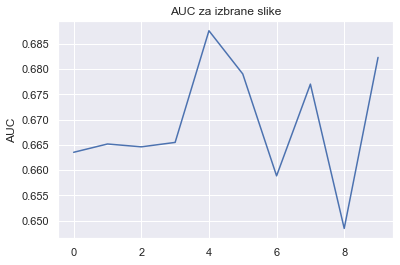

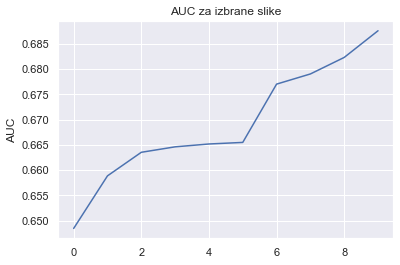

In [4]:
cv_results_file = '../results/cv-generated-data-nr-2-n-02-l-100-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-02-l-100-b.csv'
save_scores(scores, results_file)